初赛提供2012年1月-2017年10月盐城分车型销量配置数据，  参赛者允许使用任何可公开的外部数据辅助预测。 
初赛分为两个阶段，第一阶段需要参赛者预测2017年11月盐城分车型销量数据，第二阶段需要参赛者预测2017年12月盐城分车型销量数据。
第一阶段评测时间：2018年1月15日-2月25日
第二阶段评测时间：2018年2月26日-2月27日

数据时长：2012年1月 至 2017年10月

|                         |              |                                     |
|-------------------------|--------------|-------------------------------------|
| **字段**                | **含义**     | **示例**                            |
| sale\_date              | 销售日期     | 201201                              |
| class\_id               | 车型ID       | 234567                              |
| sale\_quantity          | 销量         | 15                                  |
| brand\_id               | 品牌ID       | 234                                 |
| compartment             | 厢数         | 3                                   |
| type\_id                | 车型类别ID   | 1                                   |
| level\_id               | 车型级别ID   | 1                                   |
| department\_id          | 车型系别ID   | 1                                   |
| TR                      | 变速器档位   | 6                                   |
| gearbox\_type           | 变速器形式   | AT                                  |
| displacement            | 排量         | 2.5                                 |
| if\_charging            | 是否增压     | L                                   |
| price\_level            | 成交段       | 35-50W（“W”：万元，“WL”：万元以下） |
| driven\_type\_id        | 驱动形式ID   | 1                                   |
| fuel\_type\_id          | 燃料种类ID   | 1                                   |
| newenergy\_type\_id     | 新能源类型ID | 1                                   |
| emission\_standards\_id | 排放标准ID   | 1                                   |
| if\_MPV\_id             | 是否微客MPV  | 1                                   |
| if\_luxurious\_id       | 是否豪华ID   | 1                                   |
| power                   | 功率         | 160                                 |
| cylinder\_number        | 缸数         | 6                                   |
| engine\_torque          | 发动机扭矩   | 250                                 |
| car\_length             | 车长         | 4531                                |
| car\_width              | 车宽         | 1817                                |
| car\_height             | 车高         | 1421                                |
| total\_quality          | 总质量       | 1980                                |
| equipment\_quality      | 整备质量     | 1565                                |
| rated\_passenger        | 额定载客     | 5                                   |
| wheelbase               | 轴距         | 2760                                |
| front\_track            | 前轮距       | 1500                                |
| rear\_track             | 后轮距       | 1529                                |


** 参赛者需提交的结果数据**

|**字段**   | **含义**   | **示例** |
|---------|-------------|-------- |
|predict_date      |预测日期   | 201711 |
|class_id | 车型ID | 123456 |
|predict_quantity | 预测销量 | 1234 |


|字段|sale_date|class_id|sale_quantity|brand_id|compartment|type_id|level_id|department_id|TR|gearbox_type|
|---|---------|--------|-------------|--------|-----------|-------|---------|------------|--|------------|
|含义|销售日期|车型ID|销量|品牌ID|厢数|车型类别ID|车型级别ID|车型系别ID|变速器档位|变速器形式|
|示例|201201|234567|15|234|3|1|1|1|6|AT|

|字段|displacement|if_charging|price_level|driven_type_id|fuel_type_id|newenergy_type_id|emission_standards_id|if_MPV_id|if_luxurious_id|power|
|---|---------|--------|-------------|--------|-----------|-------|---------|------------|--|------------|
|含义|排量|是否增压|成交段|驱动形式ID|燃料种类ID|新能源类型ID|排放标准ID|是否微客MPV|是否豪华ID|功率|
|示例|2.5|L|35-50W（“W”：万元，“WL”：万元以下）|1|1|1|1|1|1|160|

|字段|cylinder_number|engine_torque|car_length|car_width|car_height|total_quality|equipment_quality|rated_passenger|wheelbase|front_track|rear_track|
|---|---------|--------|-------------|--------|-----------|-------|---------|------------|--|------------|
|含义|缸数|发动机扭矩|车长|车宽|车高|总质量|整备质量|额定载客|轴距|前轮距|后轮距|
|示例|6|250|4531|1817|1421|1980|1565|5|2760|1500|1529|


**初赛结果评价指标**

主办方将依据参赛者提供的最终预测结果进行评价，评价指标的计算公式为：

$$ \varepsilon 
 = \sqrt{\frac{\Sigma_{i=1}^{n}{(p_i - a_i)^2}}{n}} $$
 
其中:

1. $\varepsilon$ 参赛者最终分数
2. $n$ 测试样本总量
3. $p_i$ 第$i$个测试样本的预测值
4. $a_i$ 第$i$个测试样本的真实值

In [366]:
%matplotlib inline
from __future__ import print_function
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from scipy import stats
pd.set_option('mode.chained_assignment',None)

In [329]:
def get_score(y_pred, y):
    return np.sqrt(np.mean((y_pred - y)**2))

def get_mean(x):
    """
    x like 7-8
    return int (7+8) /2 
    """
    if '-' in x:
        return round(np.mean([int(i) for i in x.split('-')]))
    else:
        return x
def get_price(x,label):
    """
    15-25w
    low: 15
    high: 25
    5wl
    low:0
    high:5
    """
    x = x.lower()
    if '-' in x:
        x1, x2 = x.replace('w','').split('-')
    elif x.endswith('l'):
        x1 = 0
        x2 = x.replace('wl','')
    if label == 'low':
        return x1
    else:
        return x2
    
def eval_model(alg, train_data, y, usenormal=False):
    print("eval model", alg)
    X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.2, random_state=0)
    pred = alg.fit(X_train, y_train).predict(X_test)
    if usenormal:
        print("score:", get_score(np.expm1(pred), np.expm1(y_test)))
    else:
        print("score:", get_score(pred, y_test))
    return True

In [330]:
df_train = pd.read_csv('./input/yancheng_train_20171226.csv',  low_memory=False)
df_test  = pd.read_csv('./input/yancheng_testA_20171225.csv',  low_memory=False)
y  = df_train['sale_quantity']
print("train shape:",df_train.shape)
print("test shape:", df_test.shape)
print(df_test.head(2))

train shape: (20157, 32)
test shape: (140, 3)
   predict_date  class_id  predict_quantity
0        201711    103507               NaN
1        201711    124140               NaN


In [440]:
k = df_train[df_train.class_id == 425432]
k.sort_values(['sale_date','sale_quantity'], axis=0, ascending=False, inplace=True)

,sale_date,class_id,sale_quantity,brand_id,compartment,type_id,level_id,department_id,TR,gearbox_type,...,engine_torque,car_length,car_width,car_height,total_quality,equipment_quality,rated_passenger,wheelbase,front_track,rear_track
2713,201710,425432,1502,750,3,2,1,4,6,AT,...,155,4605,1765,1460,1755,1245,5,2610,1517,1493
4042,201710,425432,200,750,3,2,1,4,7,DCT,...,225,4605,1765,1460,1800,1290,5,2610,1517,1493
4294,201710,425432,146,750,3,2,1,4,6,AT,...,155,4605,1765,1460,1775,1265,5,2610,1517,1493
4904,201709,425432,1147,750,3,2,1,4,6,AT,...,155,4605,1765,1460,1755,1245,5,2610,1517,1493
3575,201709,425432,127,750,3,2,1,4,7,DCT,...,225,4605,1765,1460,1800,1290,5,2610,1517,1493
4817,201709,425432,91,750,3,2,1,4,5,MT,...,155,4605,1765,1460,1725,1215,5,2610,1517,1493
3838,201709,425432,73,750,3,2,1,4,6,AT,...,155,4605,1765,1460,1775,1265,5,2610,1517,1493
4325,201709,425432,55,750,3,2,1,4,5,MT,...,155,4605,1765,1460,1735,1225,5,2610,1517,1493
4553,201709,425432,46,750,3,2,1,4,5,MT,...,155,4605,1765,1460,1720,1210,5,2610,1517,1493
3448,201708,425432,1301,750,3,2,1,4,6,AT,...,155,4605,1765,1460,1755,1245,5,2610,1517,1493


In [332]:
df_train['TR'][df_train.TR.str.contains(';')] = df_train['TR'][df_train.TR.str.contains(';')].apply(lambda x: x.split(';')[0])
df_train['engine_torque'][df_train.engine_torque == '155/140'] = 155
df_train['power'][df_train.power == '81/70'] = 81
df_train['engine_torque'][df_train.engine_torque == '-'] = 0
df_train['level_id'][df_train.level_id == '-'] = 1
df_train['fuel_type_id'][df_train.fuel_type_id == '-'] = 1
df_train['rated_passenger'] = df_train.rated_passenger.apply(lambda x: get_mean(str(x)) )

In [333]:
#需要抽取的特征及特征数据类型
from collections import OrderedDict
need_features = OrderedDict([('sale_date', 'int'),( 'class_id', 'int'),( 'displacement', 'float'),('if_charging','str'),( 
                 'power', 'float'),( 'price_level', 'str'),('sale_quantity','int')])
need_features = OrderedDict([('sale_date','int'),('class_id','int'),('brand_id','int'),
                             ('department_id','int'),('TR','int'),
                             ('gearbox_type','str'),('displacement','float'),('price_level','str'),
                             ('emission_standards_id','int'),
                             ('power','float'),('engine_torque','float'),('car_length','int'),
                             ('car_width','int'),('car_height','int'),('total_quality','int'),('equipment_quality','int'),
                             ('wheelbase','int'),('front_track','int'),('rear_track','int')])

In [334]:
grp = df_train.groupby(list(need_features.keys()))
df_result = pd.DataFrame(list(grp.groups.keys()), columns = list(need_features.keys()))
df_result = df_result.astype(dict(need_features), copy=True)
df_result['sale_quantity'] = list(grp['sale_quantity'].sum()) 
df_result.head(10)

,sale_date,class_id,brand_id,department_id,TR,gearbox_type,displacement,price_level,emission_standards_id,power,engine_torque,car_length,car_width,car_height,total_quality,equipment_quality,wheelbase,front_track,rear_track,sale_quantity
0,201406,580470,750,4,6,AT,1.6,10-15W,3,77.0,155.0,4523,1775,1467,1810,1310,2610,1517,1493,16
1,201610,692703,807,1,7,DCT,1.5,10-15W,1,112.0,235.0,4510,1852,1677,1900,1500,2650,1575,1570,49
2,201405,621073,98,1,5,MT,1.5,5WL,1,82.0,146.5,4400,1680,1770,1825,1305,2720,1420,1440,25
3,201507,628041,750,4,6,AT,1.6,15-20W,1,81.0,155.0,4255,1799,1452,1740,1260,2637,1549,1520,26
4,201208,883691,750,4,7,DCT,1.4,20-25W,3,96.0,220.0,4865,1820,1475,1930,1470,2812,1552,1551,434
5,201707,354068,692,5,0,CVT,1.6,10-15W,1,93.0,154.0,4631,1760,1503,1650,1236,2700,1540,1540,26
6,201611,923841,450,2,6,AT,1.6,15-20W,1,131.0,235.0,4855,1854,1474,1960,1535,2737,1585,1587,68
7,201501,735971,761,2,6,AT,1.8,10-15W,1,105.0,177.0,4671,1815,1478,1840,1430,2685,1544,1558,85
8,201412,124140,783,1,6,MT,2.0,10-15W,1,116.0,200.0,4650,1850,1695,2050,1640,2700,1565,1565,17
9,201704,924154,637,2,6,AT,1.5,10-15W,1,85.0,142.0,4587,1825,1490,1675,1300,2687,1562,1548,9


ValueError: x and y must have same first dimension

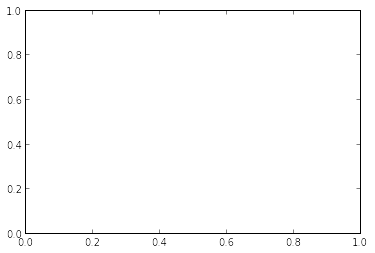

In [428]:
#把price_level 扩展成两个特征，是一个最低值，一个最高值
# df_result['price_low'] = df_result['price_level'].apply(lambda x: get_price(x, 'low'))
# df_result['price_high'] = df_result['price_level'].apply(lambda x: get_price(x, 'high'))
# df_result.drop(labels='price_level', axis=1, inplace=True)
# need_features['price_low'] = 'int'
# need_features['price_high'] = 'int'
# del need_features['price_level'

In [337]:
lb = LabelEncoder()
scaler = MinMaxScaler()
train_data = df_result[list(need_features.keys())]
y = df_result['sale_quantity'].astype('int')
logy = np.log1p(y)
#对特征数据进行处理：数值型进行标准化，条目型进行条目编码
for feature in  train_data.columns:
    if feature in ['sale_date','class_id','']:
        continue
    if  need_features[feature] == 'str':
        train_data[feature] = lb.fit_transform(train_data[feature])
    else:
        train_data[feature] = scaler.fit_transform(train_data[feature].values.reshape(-1,1))
print("train shape:", train_data.shape)
print("lable shape:", y.shape)
print(train_data.head(10))

train shape: (20095, 20)
lable shape: (20095,)
   sale_date  class_id  brand_id  department_id        TR  gearbox_type  \
0     201406    580470  0.758479       0.500000  0.666667             1   
1     201610    692703  0.817061       0.000000  0.777778             4   
2     201405    621073  0.088386       0.000000  0.555556             5   
3     201507    628041  0.758479       0.500000  0.666667             1   
4     201208    883691  0.758479       0.500000  0.777778             4   
5     201707    354068  0.698869       0.666667  0.000000             3   
6     201611    923841  0.450154       0.166667  0.666667             1   
7     201501    735971  0.769784       0.166667  0.666667             1   
8     201412    124140  0.792395       0.000000  0.666667             5   
9     201704    924154  0.642343       0.166667  0.666667             1   

   displacement  emission_standards_id     power  engine_torque  car_length  \
0      0.444444                    0.5  0.213636

In [338]:
gdm = XGBRegressor(learning_rate=0.1, n_estimators=1000, n_jobs=-1,
              seed=0, max_depth=7,gamma=8.0, subsample=0.7)
lr = LinearRegression(n_jobs=-1)
lass = LassoCV(n_jobs=-1, random_state=0, cv=10, tol=1e-4)
mlp = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001,
             batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
             power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, 
             verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
             early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
svm = SVR(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, C=1.0, 
          epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)

In [343]:
for model in [gdm, svm]:
   eval_model(model, train_data, logy, 1)

eval model XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
score: 238.28347485313057


True

In [340]:
fi = pd.DataFrame({'name':train_data.columns, 'importance': gdm.feature_importances_})
print(fi)

    importance                   name
0     0.363071              sale_date
1     0.048681               class_id
2     0.027021               brand_id
3     0.012224          department_id
4     0.017907                     TR
5     0.017049           gearbox_type
6     0.021124           displacement
7     0.014154  emission_standards_id
8     0.056401                  power
9     0.042033          engine_torque
10    0.061977             car_length
11    0.027665              car_width
12    0.045572             car_height
13    0.070555          total_quality
14    0.084495      equipment_quality
15    0.022625              wheelbase
16    0.026807            front_track
17    0.027021             rear_track
18    0.013618              price_low
19    0.000000             price_high


In [ ]:
import time
if False:
    test_data = train_data.copy(deep=True)
    add_cols = ['class_id','displacement','power','cylinder_number']
    new_test = {'class_id':[],'displacement':[],'power':[],'cylinder_number':[]}

    for class_id in test_data.class_id.unique():
        k = test_data[add_cols][test_data.class_id == int(class_id)].drop_duplicates()
        for col in add_cols:
            new_test[col] += k[col].tolist()
    data = pd.DataFrame(new_test)
    result = pd.merge(data, df_test[['class_id','predict_date']], on='class_id')
    result.rename({'predict_date':'sale_date'}, axis=1 ,inplace=True)
    result = result[['sale_date','class_id','displacement','power','cylinder_number']]
    result.head()
    pred_test = gdm.predict(result)
    pred_result = pd.DataFrame({'predict_date':result.sale_date, 'class_id': result.class_id,
                            'predict_quantity':pred_test})
    grp = pred_result.groupby('class_id')
    d = grp['predict_quantity'].sum().astype('int')
    tmp_result =  pd.DataFrame({'class_id':d.keys(), 'predict_quantity':d.values})
    final_pred_result = pd.merge(df_test[['predict_date','class_id']],
                                 tmp_result, 
                                 on='class_id')

    today = time.strftime('%Y%m%d_%H')
    final_pred_result.to_csv('./output/yancheng-{}.csv'.format(today), index=False)
    final_pred_result.head(10)